In [8]:
x1=[4,8,13,7]
x2=[11,4,5,14]

In [11]:
x1_mean= np.mean(x1)
x2_mean=np.mean(x2)
print(x1_mean,x2_mean)

8.0 8.5


In [9]:
import numpy as np
import pandas as pd

In [13]:
covar=np.cov(x1,x2)
covar

array([[ 14., -11.],
       [-11.,  23.]])

In [15]:
eigen_values,eigen_vectors=np.linalg.eig(covar)

In [16]:
eigen_values

array([ 6.61513568, 30.38486432])

In [17]:
eigen_vectors

array([[-0.83025082,  0.55738997],
       [-0.55738997, -0.83025082]])

In [18]:
x1

[4, 8, 13, 7]

In [27]:
val1=[]
for i in range(len(x1)):
    val1.append(x1[i]-x1_mean)
val1

[-4.0, 0.0, 5.0, -1.0]

In [28]:
val2=[]
for j in range(len(x2)):
    val2.append(x2[j]-x2_mean)
val2

[2.5, -4.5, -3.5, 5.5]

In [29]:
arr1= np.array([val1,val2])

In [30]:
arr1

array([[-4. ,  0. ,  5. , -1. ],
       [ 2.5, -4.5, -3.5,  5.5]])

In [31]:
pc1= eigen_vectors[0]@arr1

In [32]:
pc1

array([ 4.7144782 , -2.50825486, -6.10211899,  3.89589565])

In [33]:
pc2=eigen_vectors[1]@arr1

In [34]:
pc2

array([ 0.15393283,  3.73612869,  0.11892802, -4.00898954])

## PCA

In [35]:
from sklearn.datasets import load_digits

In [36]:
my_data= load_digits()

In [37]:
my_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [38]:
print(my_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [40]:
features= pd.DataFrame(my_data.data,columns=my_data.feature_names)

In [41]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


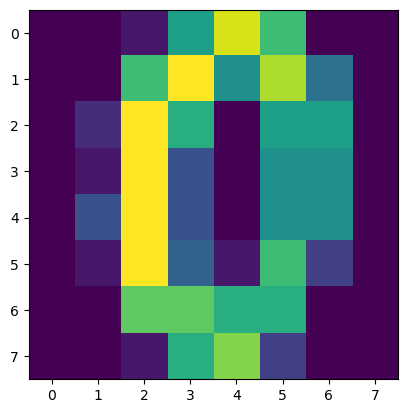

In [46]:
img=features.loc[10].values.reshape(8,8)
plt.imshow(img)

In [47]:
target= pd.DataFrame(my_data.target,columns=['Target'])

In [48]:
target

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [49]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347, 1)
(450, 1)


In [52]:
log_model= LogisticRegression(multi_class='ovr')

In [53]:
log_model.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [54]:
y_pred= log_model.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.9577777777777777

In [71]:
pca= PCA(n_components=0.95)

In [72]:
pca.fit(x_train)
pca.fit(x_test)

PCA(n_components=0.95)

In [73]:
x_train_new= pca.transform(x_train)
x_test_new= pca.transform(x_test)

In [74]:
print(x_train_new.shape,x_test_new.shape)

(1347, 27) (450, 27)


In [75]:
log_model.fit(x_train_new,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [76]:
y_pred= log_model.predict(x_test_new)

In [77]:
accuracy_score(y_test,y_pred)

0.9688888888888889

In [78]:
pca.explained_variance_ratio_

array([0.15632758, 0.15039126, 0.1133261 , 0.07570252, 0.05961894,
       0.04960901, 0.04373182, 0.03704573, 0.03426341, 0.02847265,
       0.02321993, 0.02214799, 0.01893021, 0.01659029, 0.01506678,
       0.01255355, 0.01227575, 0.01187076, 0.01066618, 0.00939863,
       0.00876241, 0.00803821, 0.00739737, 0.00679194, 0.0062275 ,
       0.00597506, 0.00571287])